<a href="https://colab.research.google.com/github/irwanmaulana42/google-collab/blob/master/tb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok: <br>
1. Irwan Maulana - 41519120030 <br>
2. Laura Zulia Sofianah - 41519120015 <br>
3. Devana Azzahra Salam - 415191.....

Algoritma Decision Tree

DATA TRAINING
    panjang_sepal  lebar_sepal  panjang_kelopak  lebar_kelopak  \
0             5.1          3.5              1.4            0.2   
1             4.9          3.0              1.4            0.2   
2             4.7          3.2              1.3            0.2   
3             4.6          3.1              1.5            0.2   
4             5.0          3.6              1.4            0.2   
5             7.0          3.2              4.7            1.4   
6             6.4          3.2              4.5            1.5   
7             6.9          3.1              4.9            1.5   
8             5.5          2.3              4.0            1.3   
9             6.5          2.8              4.6            1.5   
10            6.3          3.3              6.0            2.5   
11            5.8          2.7              5.1            1.9   
12            7.1          3.0              5.9            2.1   
13            6.3          2.9              5.6            1.8

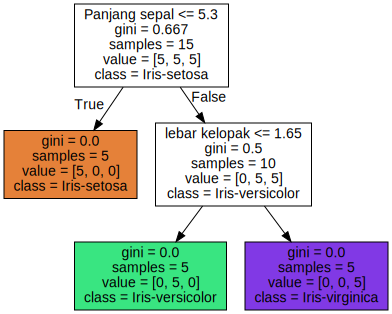

In [61]:
import pandas as pd
import numpy as np
from graphviz import Source

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import json
from urllib.request import urlopen
from sklearn.metrics import classification_report

def extractJson(value, types):
  if(types == 'X_train'):
    return [value['panjang_sepal'], value['lebar_sepal'], value['panjang_kelopak'], value['lebar_kelopak']]
  else:
    return value['label']

f = urlopen('https://raw.githubusercontent.com/irwanmaulana42/google-collab/master/sample_data.json')
myfile = f.read()
sample_data = json.loads(myfile);

print("DATA TRAINING")
print(pd.DataFrame(sample_data, columns=['panjang_sepal', 'lebar_sepal', 'panjang_kelopak', 'lebar_kelopak', 'label']), '\n\n')

X_train = list(map(lambda value: extractJson(value, types='X_train'), sample_data))
Y_train = list(map(lambda value: extractJson(value, types='Y_train'), sample_data))

TreeClassifier = DecisionTreeClassifier(max_depth=4);

TreeClassifier.fit(X_train, Y_train)

unlabelled = [[5.4, 3.9, 1.7, 0.4], [5.2, 2.7, 3.9, 1.4], [7.6, 3, 6.6, 2.1], [6.3, 2.7, 4.9, 1.8]]

print("DATA PREDICT")
print(pd.DataFrame(unlabelled, columns=['panjang_sepal', 'lebar_sepal', 'panjang_kelopak', 'lebar_kelopak']), '\n\n')

hasil = TreeClassifier.predict(unlabelled)

print("HASIL OUTPUT:")
print(hasil, '\n\n')

# Grafik
fn=['Panjang sepal','Lebar sepal','panjang kelopak','lebar kelopak']
cn=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

tree.export_graphviz(TreeClassifier,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

Source.from_file('/content/tree.dot')


# Evaluasi Report
# y_pred = TreeClassifier.predict(unlabelled);
# print(classification_report(hasil, y_pred))


Algoritma k-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import json
from urllib.request import urlopen

def extractJson(value, types):
  if(types == 'X_train'):
    return [value['panjang_sepal'], value['lebar_sepal'], value['panjang_kelopak'], value['lebar_kelopak']]
  else:
    return value['label']

f = urlopen('https://raw.githubusercontent.com/irwanmaulana42/google-collab/master/sample_data.json')
myfile = f.read()
sample_data = json.loads(myfile);

X_train = list(map(lambda value: extractJson(value, types='X_train'), sample_data))
Y_train = list(map(lambda value: extractJson(value, types='Y_train'), sample_data))

kNNClassifier = KNeighborsClassifier(n_neighbors=1);

kNNClassifier.fit(X_train, Y_train)

unlabelled = [[5.4, 3.9, 1.7, 0.4], [5.2, 2.7, 3.9, 1.4], [7.6, 3, 6.6, 2.1], [6.3, 2.7, 4.9, 1.8]]

hasil = kNNClassifier.predict(unlabelled)

print("HASIL OUTPUT: ", hasil)

HASIL OUTPUT:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor']
